In [17]:
import nengo
from nengo import spa
from nengo.synapses import filt

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn
%matplotlib inline

D = 10
rng = np.random.RandomState(0)
vocab = spa.Vocabulary(D, rng=rng)
number_dict = {"ONE":1, "TWO":2, "THREE":3, "FOUR":4, "FIVE":5,
               "SIX":6, "SEVEN":7, "EIGHT":8, "NINE":9}
number_ordered = OrderedDict(sorted(number_dict.items(), key=lambda t: t[1]))
# This should be set to 10 for the actual final test
number_range = 9
number_list = number_ordered.keys()

def nearest(d):
    from scipy.linalg import sqrtm
    p = nengo.dists.UniformHypersphere(surface=True).sample(d, d)
    return np.dot(p, np.linalg.inv(sqrtm(np.dot(p.T, p))))
orth_vecs = nearest(D)

for i in range(number_range):
    print(number_list[i])
    vocab.add(number_list[i], orth_vecs[i])

ONE
TWO
THREE
FOUR
FIVE
SIX
SEVEN
EIGHT
NINE


In [3]:
sp = np.loadtxt("data/react_time.txt")

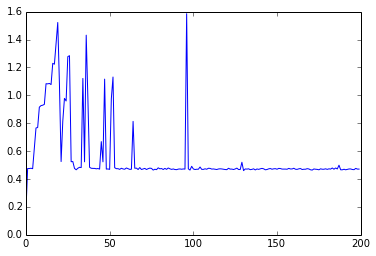

In [5]:
plt.plot(sp)

In [6]:
sp = np.loadtxt("data/paper_react_time.txt")

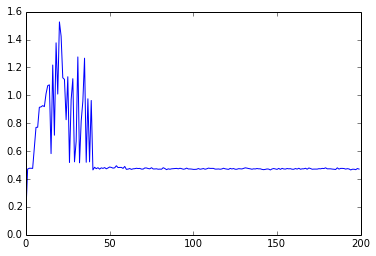

In [7]:
plt.plot(sp)

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


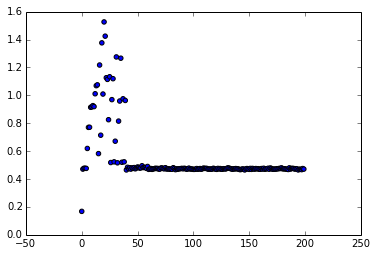

In [11]:
plt.scatter(np.arange(sp.shape[0]), sp)

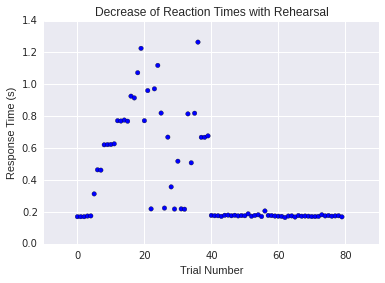

In [193]:
sp = np.loadtxt("data/paper2_react_time.txt")
sp[1:] = sp[1:] -0.3

fig = plt.figure()
plt.scatter(np.arange(sp.shape[0]), sp)
plt.title("Decrease of Reaction Times with Rehearsal")
plt.ylabel("Response Time (s)")
plt.xlabel("Trial Number")
fig.savefig("react.pdf", dpi=300, format="pdf")

In [27]:
af = np.load("data/paper2_learning_data.npz")
ti = np.load("data/paper2_time.npz")

In [28]:
error = af["p_error"]
t = ti["t"]

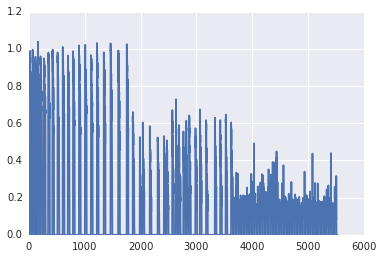

In [30]:
plt.plot(np.linalg.norm(error, axis=1))

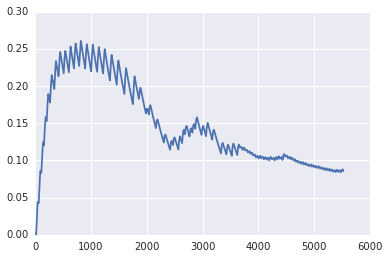

In [31]:
plt.plot(filt(np.linalg.norm(error, axis=1), 0.5, dt=0.001))

In [107]:
norm_err = np.linalg.norm(error, axis=1)
filt_err = norm_err[norm_err > 0.05]

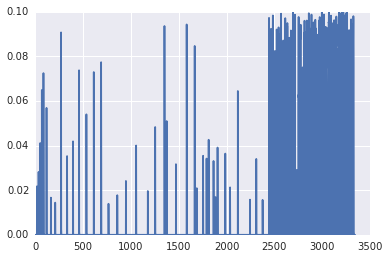

In [108]:
plt.plot(norm_err[norm_err < 0.1])

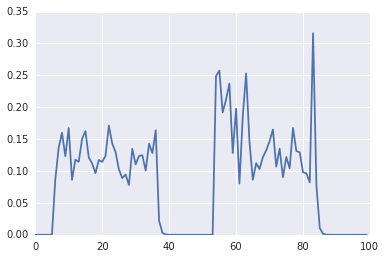

In [110]:
plt.plot(norm_err[-100:])

(99,)

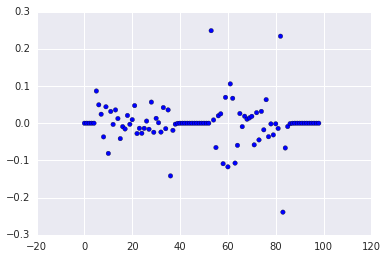

In [101]:
plt.scatter(np.arange(99),np.diff(norm_err[-100:]))

(100,)

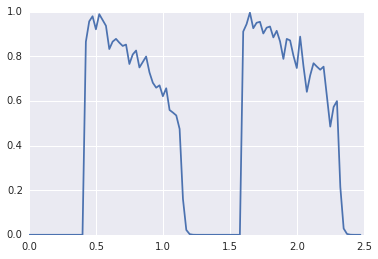

In [124]:
plt.plot(np.arange(100)*0.025, norm_err[:100])
norm_err[:100].shape

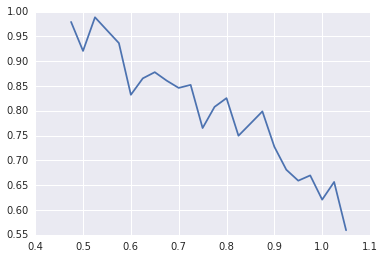

In [142]:
wat = np.arange(100)*0.025
plt.plot(wat[(wat > 0.469) & (wat < 1.069)], norm_err[:100][(wat > 0.469) & (wat < 1.069)])
#plt.plot(wat[(wat > 0.469) & (wat < 0.1)], norm_err[:100][(wat > 0.469) & (wat < 0.1)])
#plt.plot(wat[wat > 0.1], norm_err[:100][wat > 0.1])

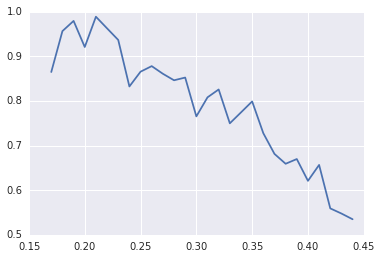

In [150]:
wat = np.arange(100)*0.01
plt.plot(wat[(wat > 0.169) & (wat < 0.449)], norm_err[:100][(wat > 0.169) & (wat < 0.449)])

dtype('bool')

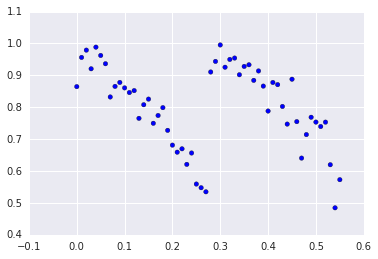

In [179]:
wat = np.arange(100)*0.01

st1 = 0.169
win = 0.28
presel = (wat > st1) & (wat < st1+win)

st2 = 0.639
win = 0.28
sel = presel | (wat > st2) & (wat < st2+win)
x = np.arange(norm_err[:100][sel].shape[0]) * 0.01
plt.scatter(x, norm_err[:100][sel])
type(sel)
sel.dtype

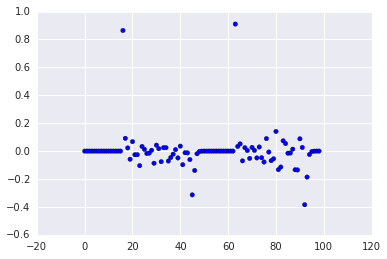

In [174]:
plt.scatter(np.arange(99),np.diff(norm_err[:100]))

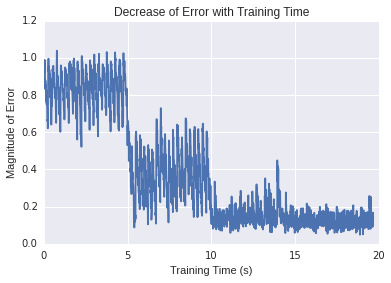

In [191]:
# Get the starting and end times from the file
import re

fi = open("data/paper2_reactions.txt", "r").readlines()

reg = re.compile(r"\d+\.\d+")
start = []
for line in fi:
    if "Question answered" in line:
        start.append(float(reg.search(line).group()))

# Loop over each time creating a bit old bitwise list
#print(start)
win = 0.25
err_len = norm_err.shape[0]
ti = np.arange(err_len)*0.01
sel = (ti > start[0]) & (ti < start[0]+win)
for si in range(1, len(start)):
    sel = sel | (ti > start[si]) & (ti < start[si] + win)
    
    
# Extract and plot
fig = plt.figure()
x = np.arange(norm_err[sel].shape[0]) * 0.01
plt.plot(x, norm_err[sel])
plt.title("Decrease of Error with Training Time")
plt.ylabel("Magnitude of Error")
plt.xlabel("Training Time (s)")
fig.savefig("error.pdf", dpi=300, format="pdf")

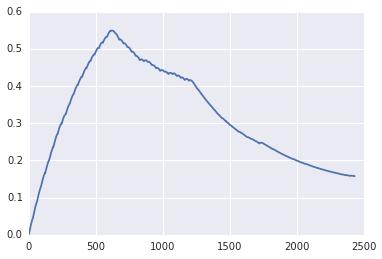

In [39]:
err = norm_err[norm_err > 0.05]
plt.plot(filt(err, 0.5, dt=0.001))

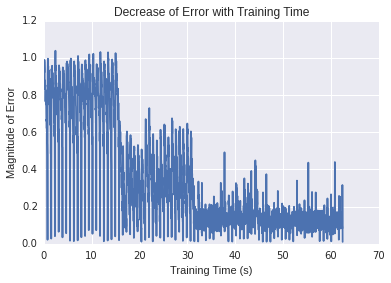

In [92]:
norm_err = np.linalg.norm(error, axis=1)
filt_err = norm_err[norm_err > 0.01]
plt.plot(np.arange(filt_err.shape[0])*0.025, filt_err)
plt.title("Decrease of Error with Training Time")
plt.ylabel("Magnitude of Error")
plt.xlabel("Training Time (s)")

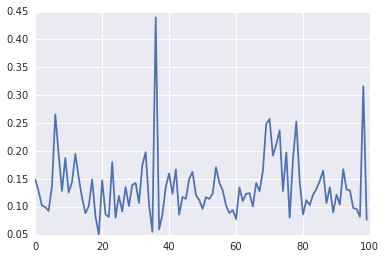

In [45]:
plt.plot(filt_err[-100:])

In [60]:
np.reshape(filt_err, (30,-1))

ValueError: total size of new array must be unchanged

In [61]:
filt_err.shape

(2433,)

In [65]:
2430/30.0

81.0

In [71]:
res = np.mean(filt_err[:2430].reshape((30,-1)), axis=0)

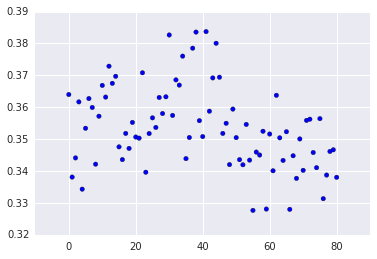

In [72]:
plt.scatter(np.arange(res.shape[0]), res)

In [79]:
import scipy
from scipy.ndimage.filters import gaussian_filter1d

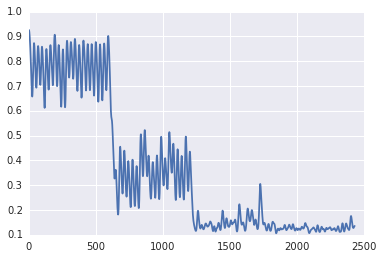

In [83]:
plt.plot(gaussian_filter1d(filt_err,5))

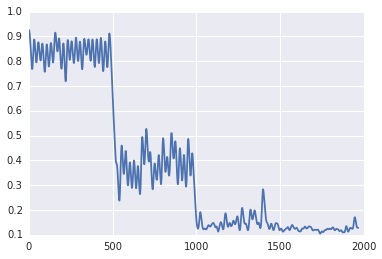

In [190]:
plt.plot(gaussian_filter1d(norm_err[sel],5))